# File upload



In [ ]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import xlrd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel("//content/drive/MyDrive/UCW - Abeba/Oxford Insight Data Set.xlsx")

# Information of Dataset



In [ ]:
# Information of de dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 37 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Country                                                   15 non-null     object 
 1   Global Ranking (2023)                                     15 non-null     int64  
 2   Total score (2023)                                        15 non-null     float64
 3   Government Pillar (2023)                                  15 non-null     float64
 4   Technology Sector Pillar (2023)                           15 non-null     float64
 5   Data & Infrastructure Pillar (2023)                       15 non-null     float64
 6   Foreign direct investment, net inflows (% of GDP) (2023)  15 non-null     float64
 7   GDP per capita (current US$) (2023)                       15 non-null     float64
 8   Gross domestic savings

In [ ]:
# Create the summary table
summary = {
    "col_name": [],
    "col_dtype": [],
    "num_of_nulls": [],
    "num_of_non_nulls": [],
    "num_of_distinct_values": [],
    "distinct_values_counts": []
}

for col in df.columns:
    summary["col_name"].append(col)
    summary["col_dtype"].append(df[col].dtype)
    summary["num_of_nulls"].append(df[col].isnull().sum())
    summary["num_of_non_nulls"].append(df[col].notnull().sum())
    summary["num_of_distinct_values"].append(df[col].nunique())
    summary["distinct_values_counts"].append(df[col].value_counts().to_dict())

summary_df = pd.DataFrame(summary)

# Display the summary table
print(summary_df)

                                             col_name col_dtype  num_of_nulls  \
0                                             Country    object             0   
1                               Global Ranking (2023)     int64             0   
2                                  Total score (2023)   float64             0   
3                            Government Pillar (2023)   float64             0   
4                     Technology Sector Pillar (2023)   float64             0   
5                 Data & Infrastructure Pillar (2023)   float64             0   
6   Foreign direct investment, net inflows (% of G...   float64             0   
7                 GDP per capita (current US$) (2023)   float64             0   
8            Gross domestic savings (% of GDP) (2023)   float64             0   
9     Gross fixed capital formation (% of GDP) (2023)   float64             0   
10  Gross fixed capital formation (current US$) (2...   float64             0   
11               Mobile cell

In [ ]:
# Show descriptive statistics for each column
summary_statistics = df.describe(include='all')

# Show summary statistics
summary_statistics

,Country,Global Ranking (2023),Total score (2023),Government Pillar (2023),Technology Sector Pillar (2023),Data & Infrastructure Pillar (2023),"Foreign direct investment, net inflows (% of GDP) (2023)",GDP per capita (current US$) (2023),Gross domestic savings (% of GDP) (2023),Gross fixed capital formation (% of GDP) (2023),...,Government (2021),Technology\nSector (2021),Data & Infrastructure Pillar (2021),"Foreign direct investment, net inflows (% of GDP) (2021)",GDP per capita (current US$) (2021),Gross domestic savings (% of GDP) (2021),Gross fixed capital formation (% of GDP) (2021),Gross fixed capital formation (current US$) (2021),Mobile cellular subscriptions (2021),Regulatory Quality: Estimate (2021)
count,15,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01,1.500000e+01,15.000000
unique,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Singapore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,50.000000,59.310667,66.913333,44.110667,66.908000,4.670509,15474.066137,27.259073,24.459130,...,67.685333,43.422000,64.780667,4.961776,14341.789612,28.845209,24.292740,7.129831e+11,2.827345e+08,0.170560
std,NaN,36.496575,13.027416,18.441663,11.440241,12.229063,7.407799,20739.132782,13.442078,8.389990,...,14.831111,12.027242,12.160700,7.734460,19829.176691,12.662912,7.667396,1.887381e+12,4.919110e+08,0.766302
min,NaN,2.000000,32.580000,34.660000,23.230000,39.870000,0.384689,1949.898969,9.884526,10.691998,...,40.920000,24.750000,47.020000,0.422364,2069.661129,12.356989,13.183714,1.332324e+10,8.761900e+06,-0.631173
25%,NaN,27.500000,52.425000,56.060000,38.685000,63.275000,1.504420,4643.659149,17.751266,18.411219,...,61.005000,36.335000,55.020000,1.493809,4047.089892,20.248490,18.592777,7.279029e+10,5.313376e+07,-0.291809
50%,NaN,42.000000,61.030000,74.560000,42.320000,67.590000,2.621186,11648.674157,26.981352,23.833864,...,69.990000,40.960000,64.590000,2.570124,9743.213131,28.573242,22.245270,1.137349e+11,8.628883e+07,-0.100666
75%,NaN,63.500000,66.205000,76.780000,51.760000,72.785000,4.417263,13828.314164,33.880927,31.119648,...,73.155000,50.355000,71.645000,4.661496,11876.064028,35.010067,30.186115,3.323601e+11,1.775050e+08,0.501013


In [ ]:
# Show column names to check for possible errors
print(df.columns)

Index(['Country', 'Global Ranking (2023)', 'Total score (2023)',
       'Government Pillar (2023)', 'Technology Sector Pillar (2023)',
       'Data & Infrastructure Pillar (2023)',
       'Foreign direct investment, net inflows (% of GDP) (2023)',
       'GDP per capita (current US$) (2023)',
       'Gross domestic savings (% of GDP) (2023)',
       'Gross fixed capital formation (% of GDP) (2023)',
       'Gross fixed capital formation (current US$) (2023)',
       'Mobile cellular subscriptions (2023)',
       'Regulatory Quality: Estimate (2023)', 'Global Position (2022)',
       'Total score (2022)', 'Government Pillar (2022)',
       'Technology Sector Pillar (2022)',
       'Data & Infrastructure Pillar (2022)',
       'Foreign direct investment, net inflows (% of GDP) (2022)',
       'GDP per capita (current US$) (2022)',
       'Gross domestic savings (% of GDP) (2022)',
       'Gross fixed capital formation (% of GDP) (2022)',
       'Gross fixed capital formation (current US$

# Analysis of missing values

In [ ]:
# Identify the number and proportion of missing values ​​in each column
missing_values_count = df.isnull().sum()
missing_values_percent = (missing_values_count / len(df)) * 100

# Create a DataFrame with the missing value information
missing_values_df = pd.DataFrame({
    'Number of missing values': missing_values_count,
    'Proporción de Valores Faltantes (%)': missing_values_percent
})

# Show the DataFrame of missing values
print("Cantidad y Proporción de Valores Faltantes en Cada Columna:")
print(missing_values_df)

Cantidad y Proporción de Valores Faltantes en Cada Columna:
                                                    Number of missing values  \
Country                                                                    0   
Global Ranking (2023)                                                      0   
Total score (2023)                                                         0   
Government Pillar (2023)                                                   0   
Technology Sector Pillar (2023)                                            0   
Data & Infrastructure Pillar (2023)                                        0   
Foreign direct investment, net inflows (% of GD...                         0   
GDP per capita (current US$) (2023)                                        0   
Gross domestic savings (% of GDP) (2023)                                   0   
Gross fixed capital formation (% of GDP) (2023)                            0   
Gross fixed capital formation (current US$) (2023)          

#Distribution of individual variables

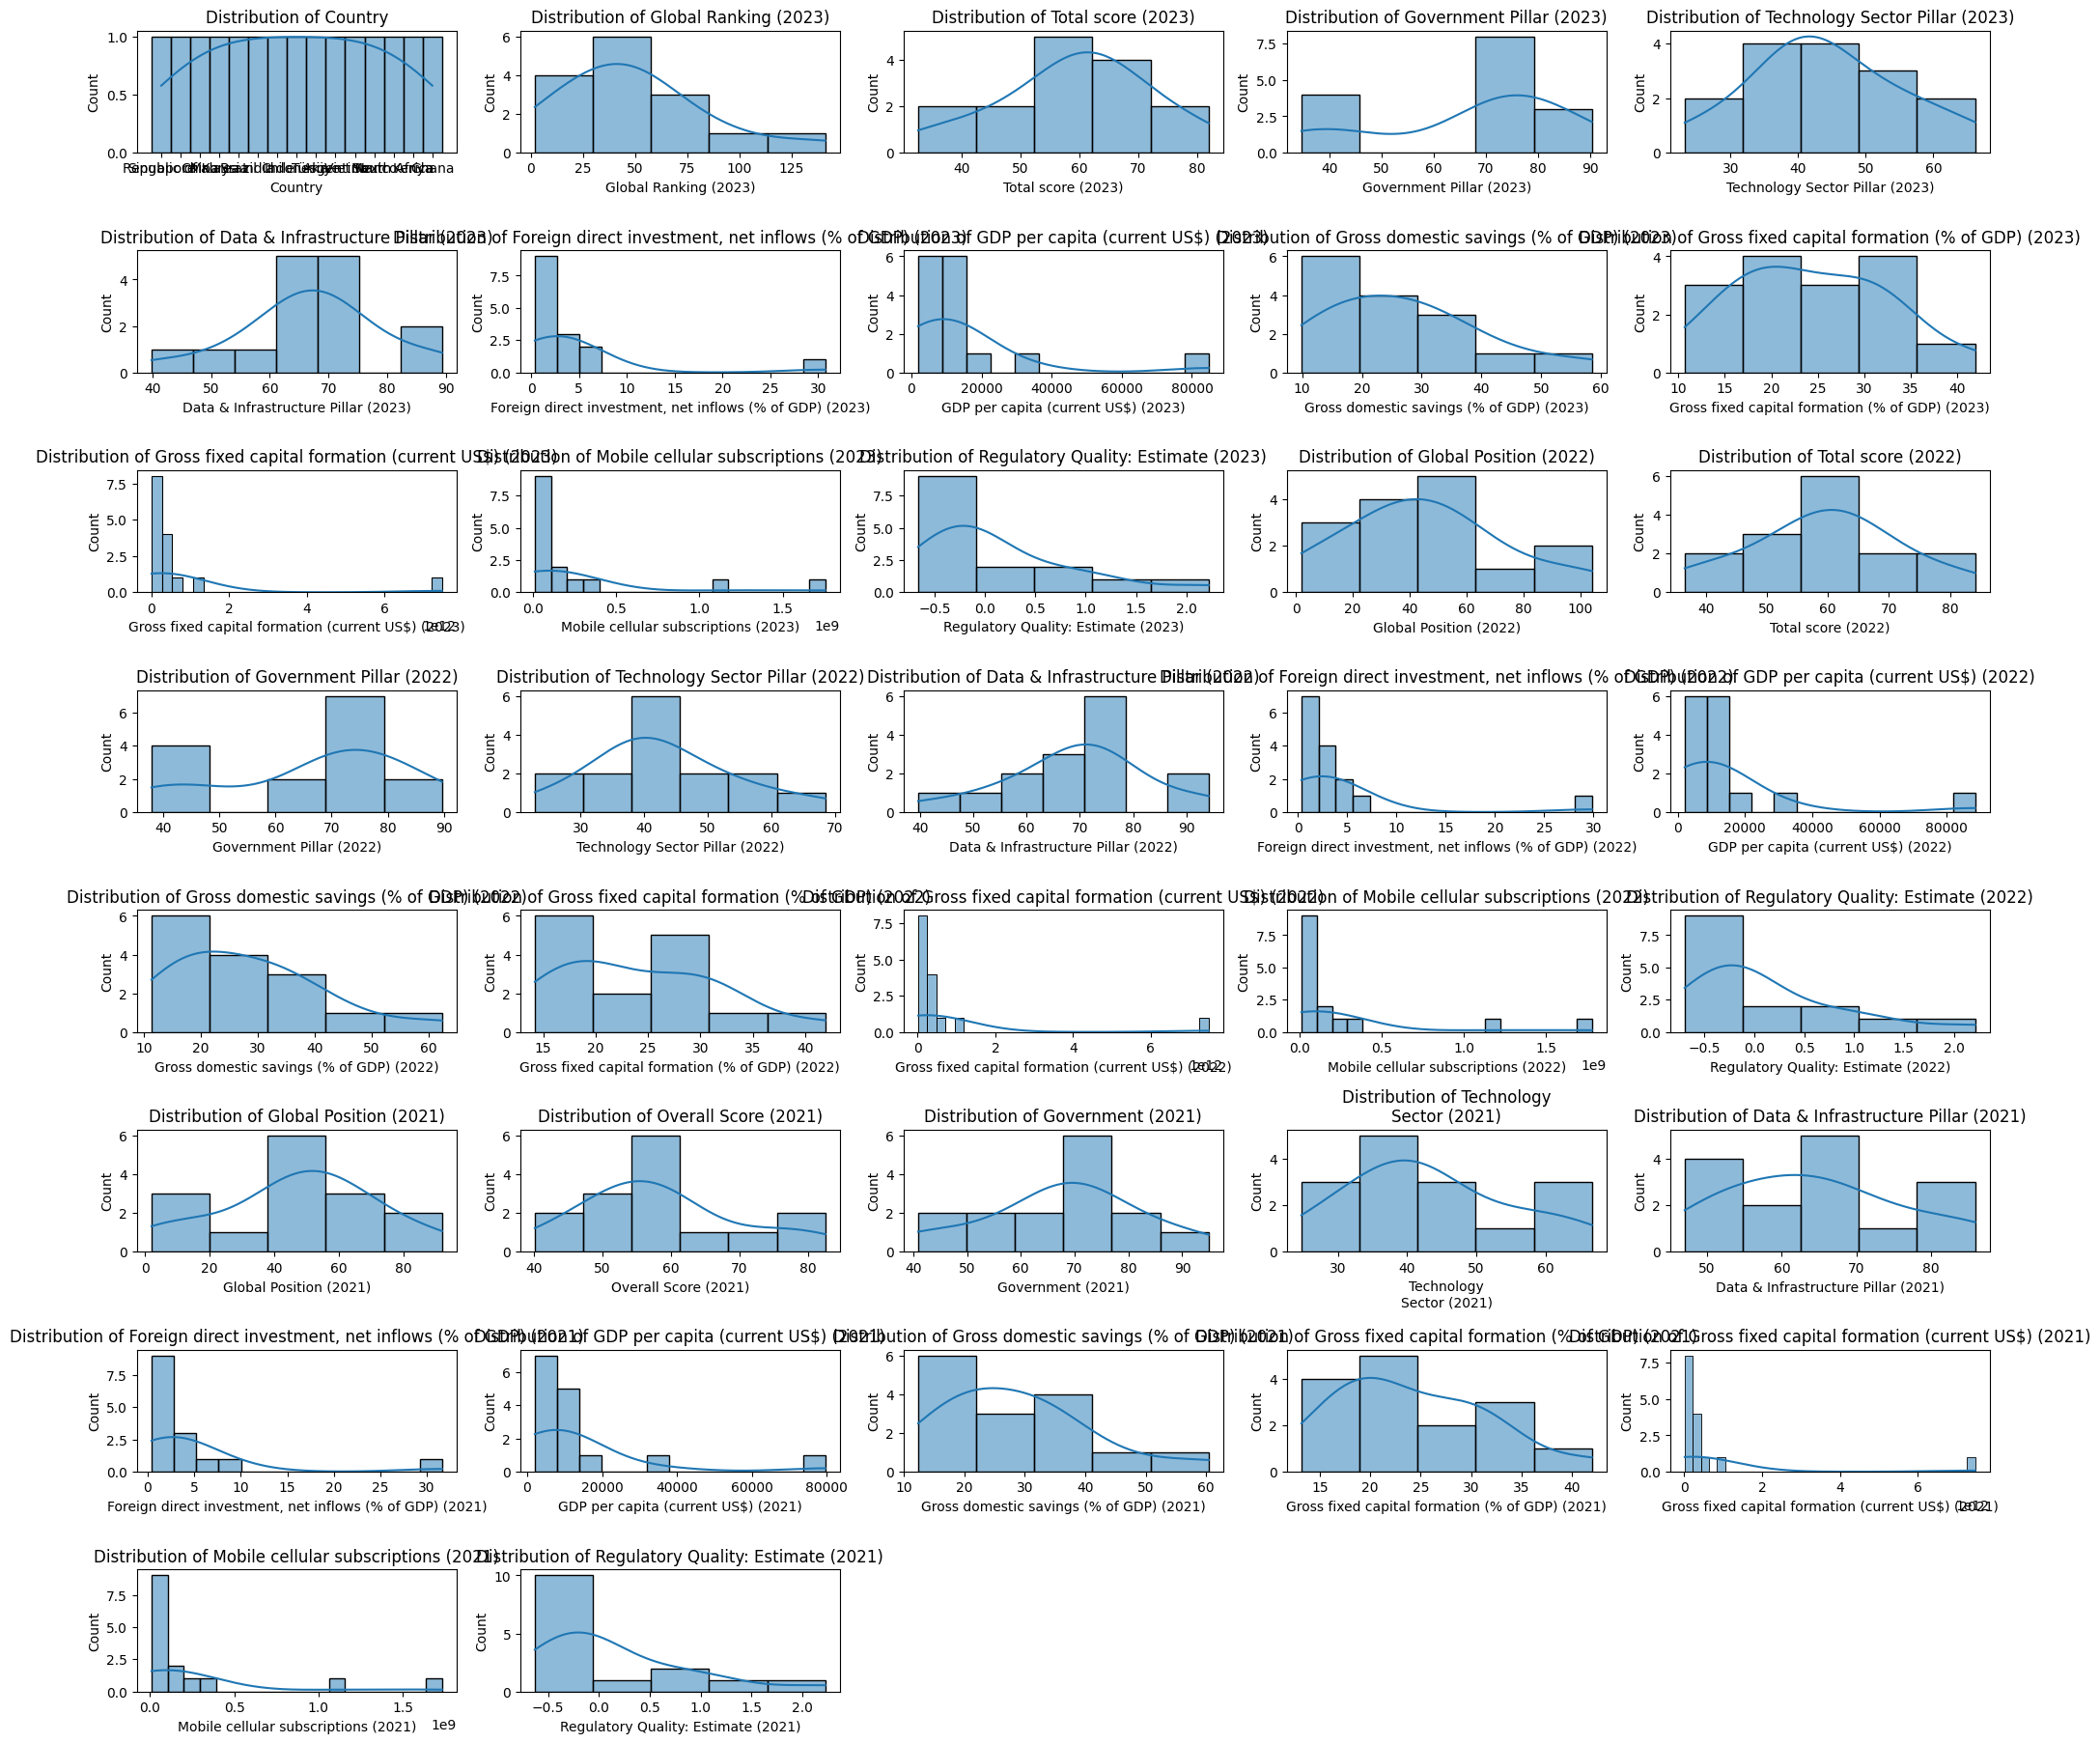

In [ ]:
# Distribution of individual variables
plt.figure(figsize=(20, 20))
for i, column in enumerate(df.columns):
    plt.subplot(9, 5, i + 1)
    sb.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

# Correlation Analysis

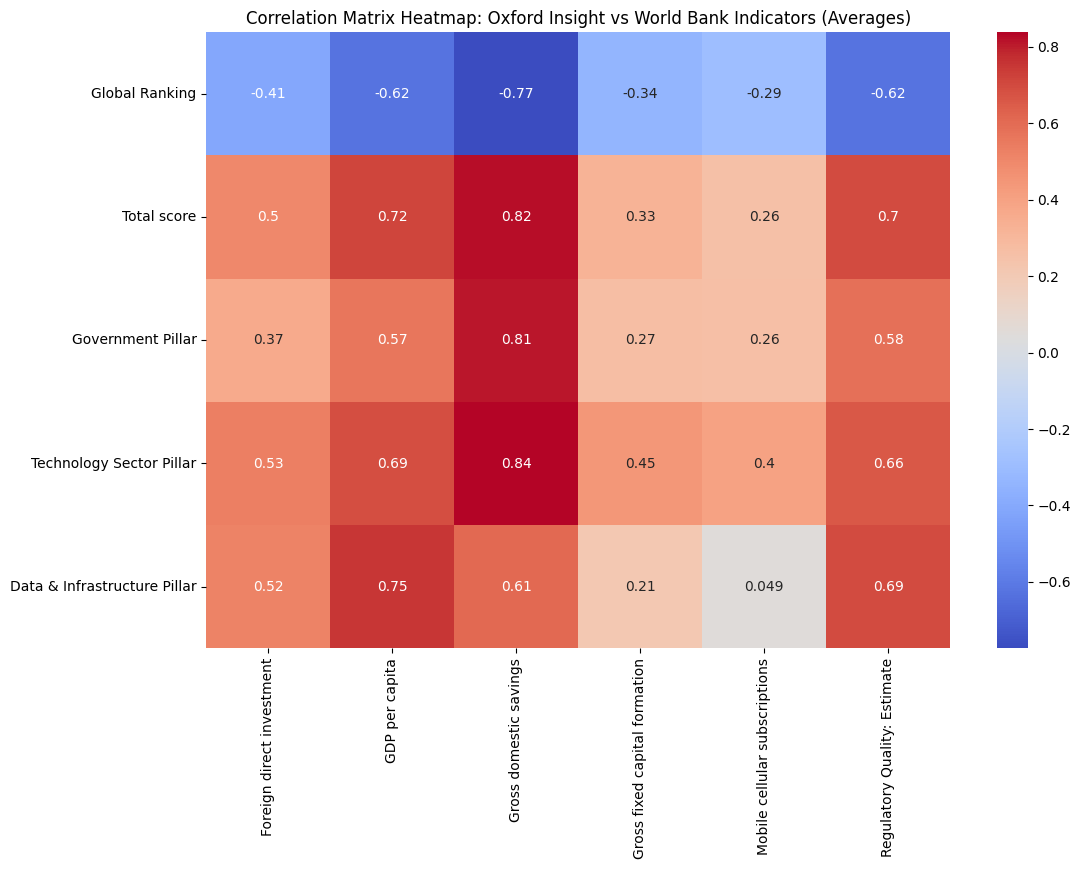

In [ ]:
# Define the key columns for Oxford Insight and World Bank
oxford_columns = {
    'Global Ranking': ['Global Ranking (2023)', 'Global Position (2022)', 'Global Position (2021)'],
    'Total score': ['Total score (2023)', 'Total score (2022)', 'Overall Score (2021)'],
    'Government Pillar': ['Government Pillar (2023)', 'Government Pillar (2022)', 'Government (2021)'],
    'Technology Sector Pillar': ['Technology Sector Pillar (2023)', 'Technology Sector Pillar (2022)', 'Technology\nSector (2021)'],
    'Data & Infrastructure Pillar': ['Data & Infrastructure Pillar (2023)', 'Data & Infrastructure Pillar (2022)', 'Data & Infrastructure Pillar (2021)']
}

worldbank_columns = {
    'Foreign direct investment': ['Foreign direct investment, net inflows (% of GDP) (2023)', 'Foreign direct investment, net inflows (% of GDP) (2022)', 'Foreign direct investment, net inflows (% of GDP) (2021)'],
    'GDP per capita': ['GDP per capita (current US$) (2023)', 'GDP per capita (current US$) (2022)', 'GDP per capita (current US$) (2021)'],
    'Gross domestic savings': ['Gross domestic savings (% of GDP) (2023)', 'Gross domestic savings (% of GDP) (2022)', 'Gross domestic savings (% of GDP) (2021)'],
    'Gross fixed capital formation': ['Gross fixed capital formation (% of GDP) (2023)', 'Gross fixed capital formation (% of GDP) (2022)', 'Gross fixed capital formation (% of GDP) (2021)'],
    'Gross fixed capital formation': ['Gross fixed capital formation (current US$) (2023)', 'Gross fixed capital formation (current US$) (2022)', 'Gross fixed capital formation (current US$) (2021)'],
    'Mobile cellular subscriptions': ['Mobile cellular subscriptions (2023)', 'Mobile cellular subscriptions (2022)', 'Mobile cellular subscriptions (2021)'],
    'Regulatory Quality: Estimate': ['Regulatory Quality: Estimate (2023)', 'Regulatory Quality: Estimate (2022)', 'Regulatory Quality: Estimate (2021)']
}

# Calculate the averages for each set of columns
oxford_avg = {key: df[columns].mean(axis=1) for key, columns in oxford_columns.items()}
worldbank_avg = {key: df[columns].mean(axis=1) for key, columns in worldbank_columns.items()}

# Create DataFrames for the averages
oxford_avg_df = pd.DataFrame(oxford_avg)
worldbank_avg_df = pd.DataFrame(worldbank_avg)

# Manually create the correlation matrix
correlation_matrix = pd.DataFrame(index=oxford_avg_df.columns, columns=worldbank_avg_df.columns)

for oxford_col in oxford_avg_df.columns:
    for worldbank_col in worldbank_avg_df.columns:
        correlation_matrix.loc[oxford_col, worldbank_col] = oxford_avg_df[oxford_col].corr(worldbank_avg_df[worldbank_col])

correlation_matrix = correlation_matrix.astype(float)

# Create the heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap: Oxford Insight vs World Bank Indicators (Averages)')
plt.show()

# Comparison by continents

              Country      Continent
0           Singapore           Asia
1   Republic of Korea           Asia
2               China           Asia
3            Malaysia           Asia
4              Brazil  South America
5               India           Asia
6               Chile  South America
7           Indonesia           Asia
8             Türkiye            NaN
9           Argentina  South America
10           Viet Nam           Asia
11             Mexico  North America
12       South Africa         Africa
13              Kenya         Africa
14              Ghana         Africa
               Overall Score (2021)  Total score (2022)  Total score (2023)
Continent                                                                  
Africa                    44.656667           41.553333           40.016667
Asia                      65.994286           68.230000           67.908571
North America             52.620000           51.780000           50.370000
South America             58

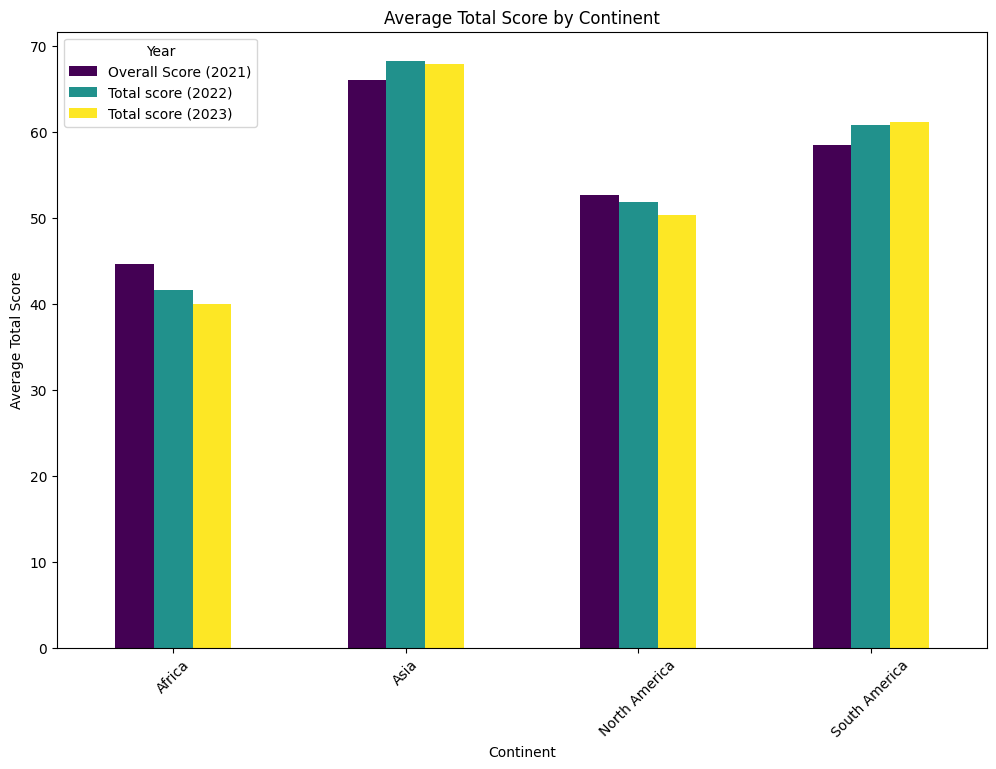

In [ ]:
# Add a continent column manually for all countries in the dataset
continent_mapping = {
    'Singapore': 'Asia',
    'Republic of Korea': 'Asia',
    'China': 'Asia',
    'Malaysia': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Viet Nam': 'Asia',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Chile': 'South America',
    'Turkey': 'Europe/Asia',
    'United States': 'North America',
    'Mexico': 'North America',
    'Canada': 'North America',
    'Ghana': 'Africa',
    'South Africa': 'Africa',
    'Kenya': 'Africa',
    # Add other countries as needed
}

# Map countries to their respective continents
df['Continent'] = df['Country'].map(continent_mapping)

# Verify that all countries have been assigned a continent
print(df[['Country', 'Continent']])

# Ensure all relevant total score columns are included
total_score_columns = ['Overall Score (2021)', 'Total score (2022)', 'Total score (2023)']

# Calculate the mean total score by continent
continent_total_scores = df.groupby('Continent')[total_score_columns].mean()

# Display the summary by continent
print(continent_total_scores)

# Create a grouped bar chart for total scores by continent
continent_total_scores.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.xticks(rotation=45)
plt.xlabel('Continent')
plt.ylabel('Average Total Score')
plt.title('Average Total Score by Continent')
plt.legend(title='Year')
plt.show()

              Country      Continent
0           Singapore           Asia
1   Republic of Korea           Asia
2               China           Asia
3            Malaysia           Asia
4              Brazil  South America
5               India           Asia
6               Chile  South America
7           Indonesia           Asia
8             Türkiye            NaN
9           Argentina  South America
10           Viet Nam           Asia
11             Mexico            NaN
12       South Africa         Africa
13              Kenya         Africa
14              Ghana         Africa
               Overall Score (2021)  Total score (2022)  Total score (2023)
Continent                                                                  
Africa                    44.656667           41.553333           40.016667
Asia                      65.994286           68.230000           67.908571
South America             58.473333           60.760000           61.123333


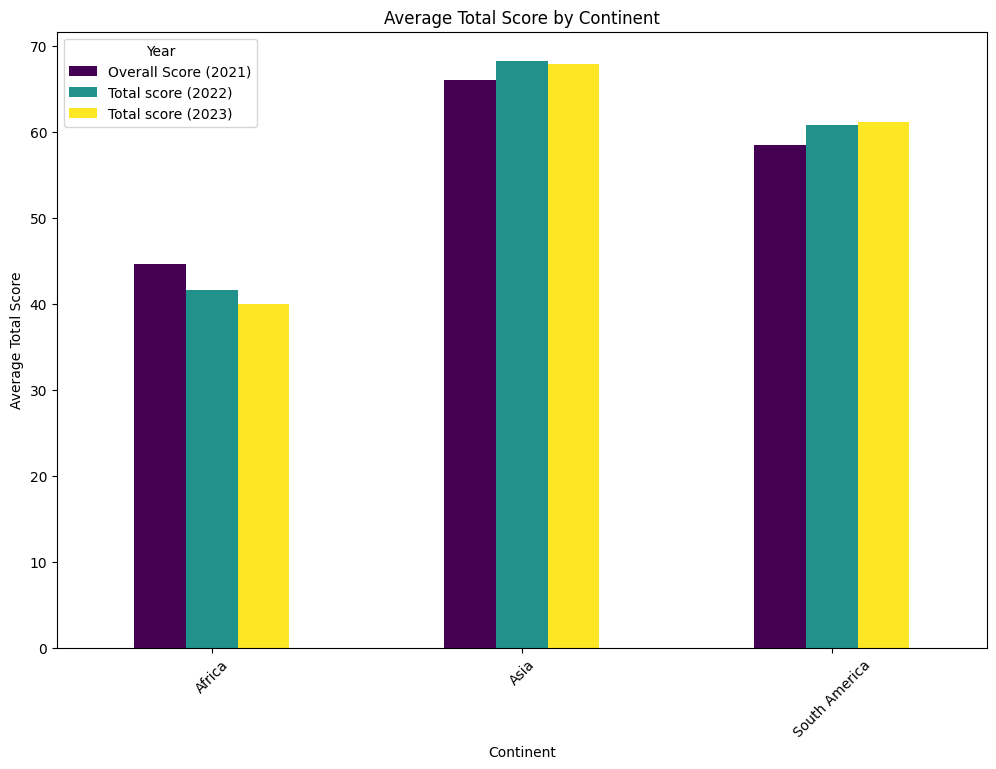

In [ ]:
# Add a continent column manually for all countries in the dataset
continent_mapping = {
    'Singapore': 'Asia',
    'Republic of Korea': 'Asia',
    'China': 'Asia',
    'Malaysia': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Viet Nam': 'Asia',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Chile': 'South America',
    'Turkey': 'Europe/Asia',
    'Ghana': 'Africa',
    'South Africa': 'Africa',
    'Kenya': 'Africa',
    # Add other countries as needed
}

# Map countries to their respective continents
df['Continent'] = df['Country'].map(continent_mapping)

# Verify that all countries have been assigned a continent
print(df[['Country', 'Continent']])

# Ensure all relevant total score columns are included
total_score_columns = ['Overall Score (2021)', 'Total score (2022)', 'Total score (2023)']

# Calculate the mean total score by continent
continent_total_scores = df.groupby('Continent')[total_score_columns].mean()

# Display the summary by continent
print(continent_total_scores)

# Create a grouped bar chart for total scores by continent
continent_total_scores.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.xticks(rotation=45)
plt.xlabel('Continent')
plt.ylabel('Average Total Score')
plt.title('Average Total Score by Continent')
plt.legend(title='Year')
plt.show()

#Comparison between best countries and worst countries by continent

<ipython-input-15-14921f00bf0c>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x='Continent', y=indicator, data=high_performance, ax=ax, ci=None, color='blue', label='High Performance')
<ipython-input-15-14921f00bf0c>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x='Continent', y=indicator, data=lower_performance, ax=ax, ci=None, color='orange', label='Lower Performance')
<ipython-input-15-14921f00bf0c>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x='Continent', y=indicator, data=high_performance, ax=ax, ci=None, color='blue', label='High Performance')
<ipython-input-15-14921f00bf0c>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x='Continent', y=indicator, data=lower_performance, ax=ax, ci=None, color='orange', label='Lower Performanc

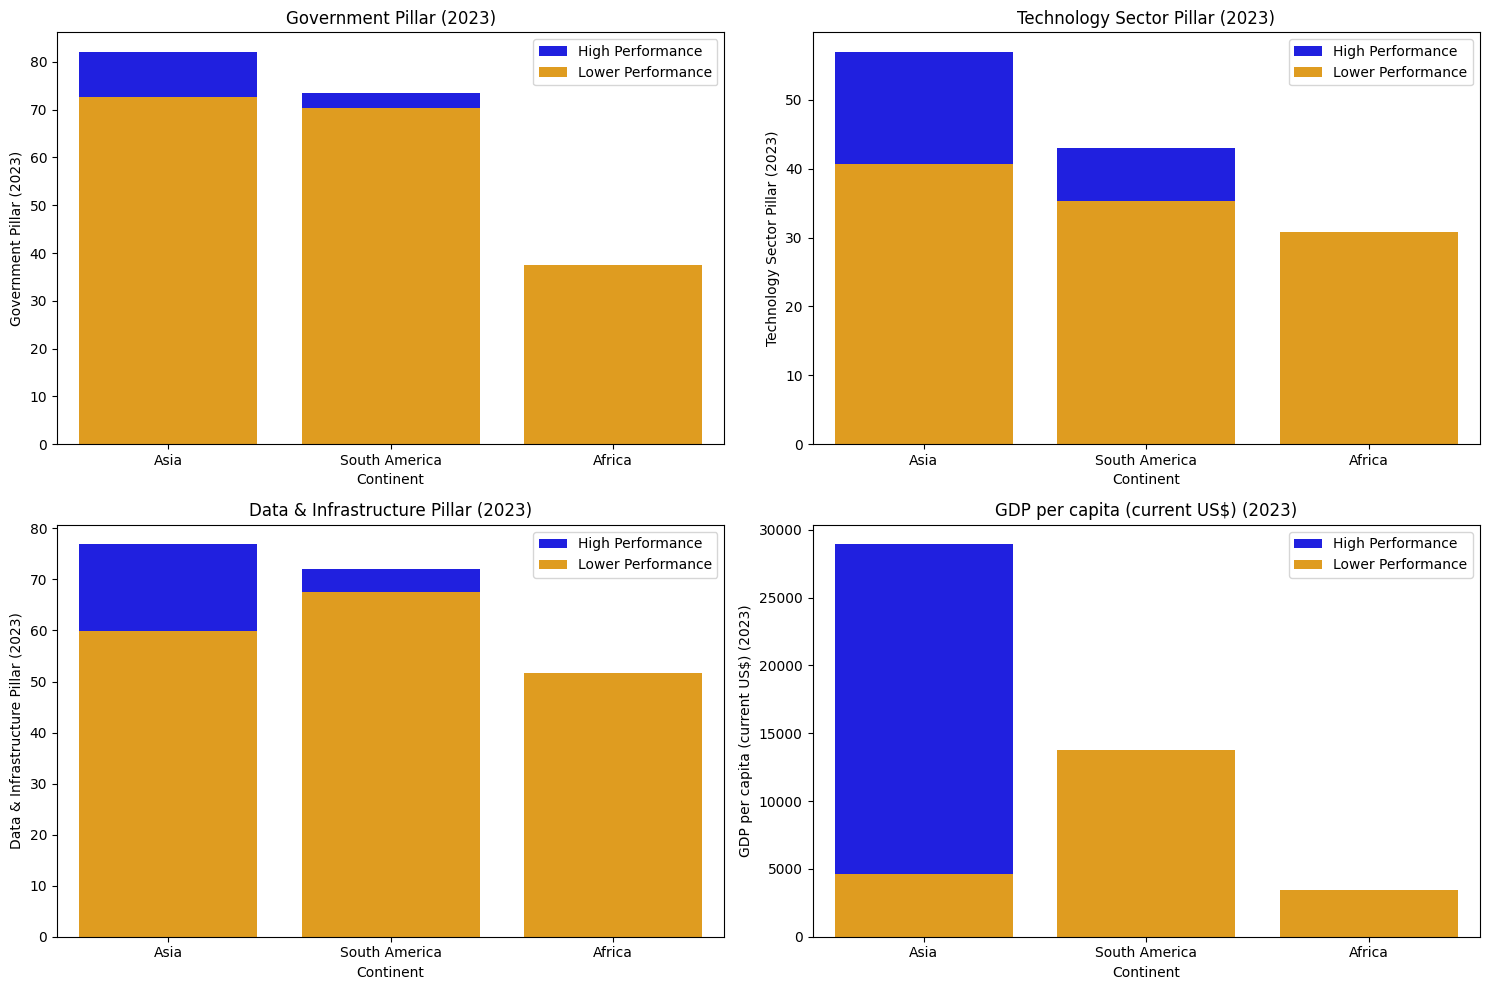

In [ ]:
# Map countries to their respective continents
df['Continent'] = df['Country'].map(continent_mapping)

# Ensure all relevant total score columns are included
total_score_columns = ['Overall Score (2021)', 'Total score (2022)', 'Total score (2023)']

# Calculate the average total score over the years
df['Average Total Score'] = df[total_score_columns].mean(axis=1)

# Define the threshold for high performance (e.g., above the median)
threshold = df['Average Total Score'].median()

# Split the dataset into high performance and lower performance
high_performance = df[df['Average Total Score'] > threshold]
lower_performance = df[df['Average Total Score'] <= threshold]

# Compare important indicators
important_indicators = ['Government Pillar (2023)', 'Technology Sector Pillar (2023)',
                        'Data & Infrastructure Pillar (2023)', 'GDP per capita (current US$) (2023)']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, indicator in enumerate(important_indicators):
    ax = axes[i//2, i%2]
    sb.barplot(x='Continent', y=indicator, data=high_performance, ax=ax, ci=None, color='blue', label='High Performance')
    sb.barplot(x='Continent', y=indicator, data=lower_performance, ax=ax, ci=None, color='orange', label='Lower Performance')
    ax.set_title(indicator)
    ax.legend()

plt.tight_layout()
plt.show()